In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler,PowerTransformer
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from IPython.display import display


In [126]:
# Load dataset
df = pd.read_csv("creditcard.csv")
target_column = 'Class'
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
numerical_features.remove(target_column)
# Display dataset shape and first few rows
print(f"Dataset Shape: {df.shape}")
print("\nSample Rows:")
display(df.head())

Dataset Shape: (284807, 31)

Sample Rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [127]:
df_dtypes = pd.DataFrame(df.dtypes).reset_index()
df_dtypes.columns = ['Column', 'Data Type']
print(df_dtypes)

    Column Data Type
0     Time   float64
1       V1   float64
2       V2   float64
3       V3   float64
4       V4   float64
5       V5   float64
6       V6   float64
7       V7   float64
8       V8   float64
9       V9   float64
10     V10   float64
11     V11   float64
12     V12   float64
13     V13   float64
14     V14   float64
15     V15   float64
16     V16   float64
17     V17   float64
18     V18   float64
19     V19   float64
20     V20   float64
21     V21   float64
22     V22   float64
23     V23   float64
24     V24   float64
25     V25   float64
26     V26   float64
27     V27   float64
28     V28   float64
29  Amount   float64
30   Class     int64


In [128]:
# Detect skewed features
print("Detecting skewed features...")
skewed_features = df[numerical_features].skew()
skewed_features = skewed_features[abs(skewed_features) > 0.5].index.tolist()
print(f"Skewed Features: {skewed_features}")

Detecting skewed features...
Skewed Features: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V24', 'V26', 'V27', 'V28', 'Amount']


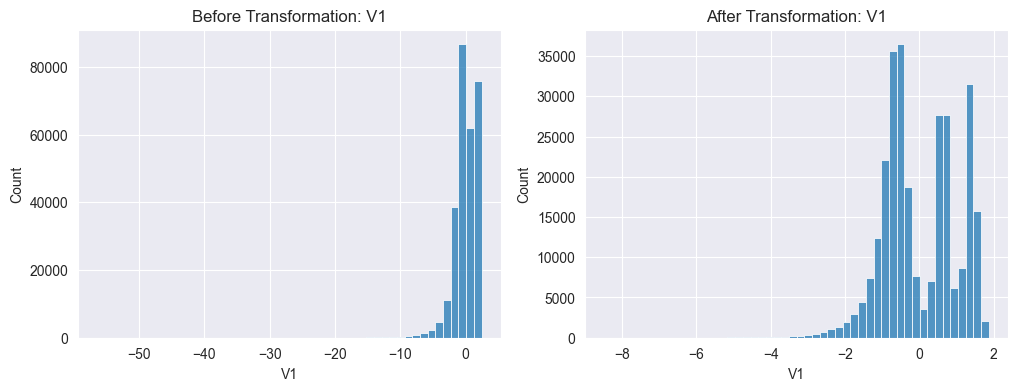

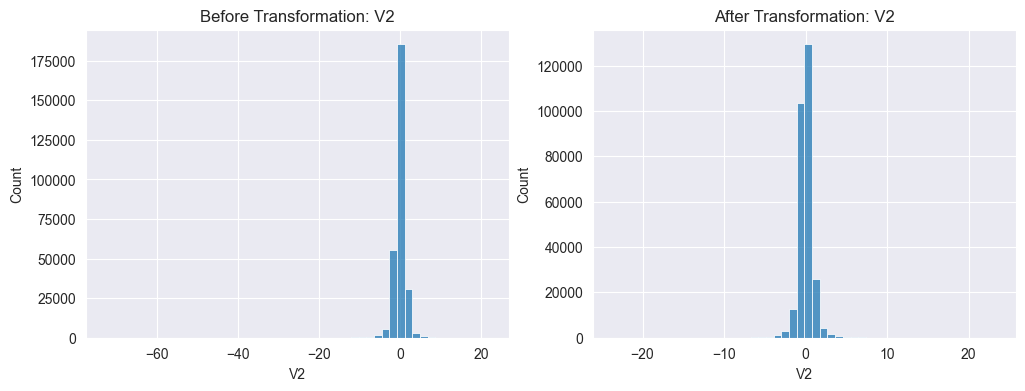

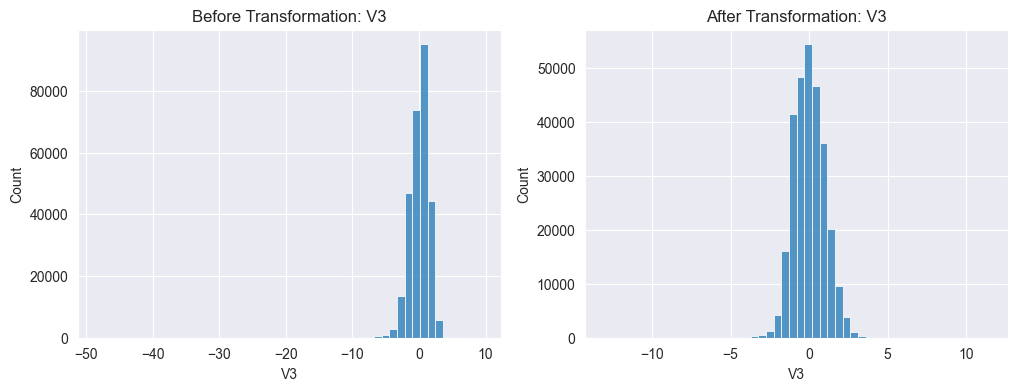

In [ ]:
for feature in skewed_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[feature], bins=50, ax=axes[0])
    axes[0].set_title(f'Before Transformation: {feature}')

    if (df[feature] > 0).all():
        df[feature], _ = boxcox(df[feature] + 1)
    elif df[feature].skew() > 2:  # Apply log transform only if extremely skewed
        df[feature] = np.log1p(df[feature])
    else:
        pt = PowerTransformer(method='yeo-johnson')
        df[feature] = pt.fit_transform(df[[feature]])

    sns.histplot(df[feature], bins=50,  ax=axes[1])
    axes[1].set_title(f'After Transformation: {feature}')

    plt.show()

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [ ]:
# Check class balance
print("Checking class balance...")
class_counts = df[target_column].value_counts(normalize=True)
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution Before Balancing")
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.show()
print("Class Distribution:")
print(class_counts)


In [ ]:
# Balance classes using SMOTE
print("Applying SMOTE for class balancing...")
X = df.drop(columns=[target_column])
y = df[target_column]
sampler = SMOTE()
X_resampled, y_resampled = sampler.fit_resample(X, y)
df = pd.DataFrame(X_resampled, columns=X.columns)
df[target_column] = y_resampled

In [ ]:
# Show class balance after resampling
class_counts = df[target_column].value_counts(normalize=True)
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution After Balancing")
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.show()
class_counts_after = df[target_column].value_counts(normalize=True)

print("Class Distribution After Balancing:")
print(class_counts_after)

print("Preprocessing complete.")
